In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../Datasets/LI-Small_Trans.csv')

In [13]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:08,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0
1,2022/09/01 00:21,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0
2,2022/09/01 00:00,11,8000ECA90,1120,8006AA910,592571.00,US Dollar,592571.00,US Dollar,Cheque,0
3,2022/09/01 00:16,3814,8006AD080,3814,8006AD080,12.32,US Dollar,12.32,US Dollar,Reinvestment,0
4,2022/09/01 00:00,20,8006AD530,20,8006AD530,2941.56,US Dollar,2941.56,US Dollar,Reinvestment,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924049 entries, 0 to 6924048
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 581.1+ MB


In [15]:
df.describe(include="all")

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
count,6924049,6.924049e+06,6924049,6.924049e+06,6924049,6.924049e+06,6924049,6.924049e+06,6924049,6924049,6.924049e+06
unique,14533,NaN,681281,NaN,576176,NaN,15,NaN,15,7,NaN
top,2022/09/01 00:22,NaN,10042B660,NaN,10042B660,NaN,US Dollar,NaN,US Dollar,Cheque,NaN
freq,15221,NaN,222037,NaN,1553,NaN,2537242,NaN,2553887,2503158,NaN
mean,NaN,5.938718e+04,NaN,8.441702e+04,NaN,6.324067e+06,NaN,4.676036e+06,NaN,NaN,5.148722e-04
std,NaN,9.051700e+04,NaN,9.064562e+04,NaN,2.105371e+09,NaN,1.544099e+09,NaN,NaN,2.268495e-02
min,NaN,0.000000e+00,NaN,0.000000e+00,NaN,1.000000e-06,NaN,1.000000e-06,NaN,NaN,0.000000e+00
25%,NaN,2.190000e+02,NaN,1.125500e+04,NaN,1.742100e+02,NaN,1.753800e+02,NaN,NaN,0.000000e+00
50%,NaN,1.419500e+04,NaN,2.964000e+04,NaN,1.397620e+03,NaN,1.399440e+03,NaN,NaN,0.000000e+00
75%,NaN,1.106820e+05,NaN,1.480400e+05,NaN,1.229633e+04,NaN,1.222687e+04,NaN,NaN,0.000000e+00


In [16]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

In [21]:
df["Is Laundering"].value_counts(normalize=True)

Is Laundering
0    0.999485
1    0.000515
Name: proportion, dtype: float64

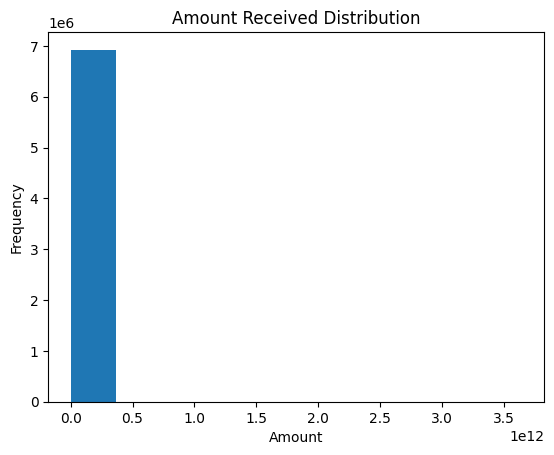

In [24]:
plt.hist(df["Amount Received"])
plt.title("Amount Received Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

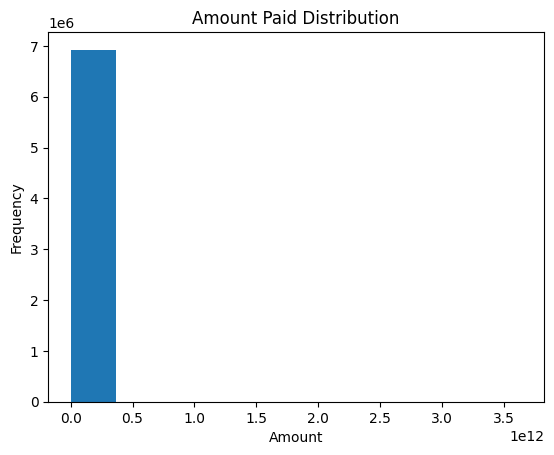

In [26]:
plt.hist(df["Amount Paid"])
plt.title("Amount Paid Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


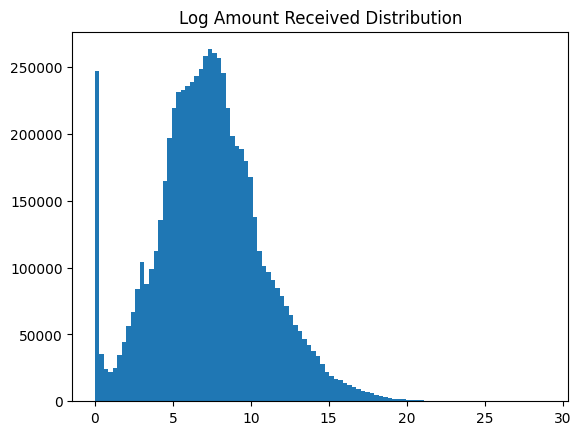

In [27]:
plt.hist(np.log1p(df["Amount Received"]), bins=100)
plt.title("Log Amount Received Distribution")
plt.show()

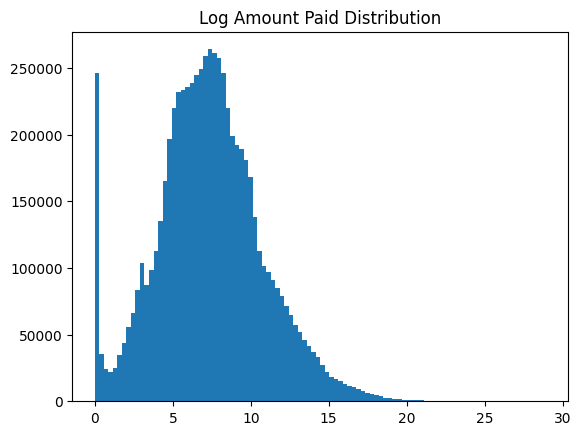

In [28]:
plt.hist(np.log1p(df["Amount Paid"]), bins=100)
plt.title("Log Amount Paid Distribution")
plt.show()

In [29]:
df.groupby("Is Laundering")[["Amount Received", "Amount Paid"]].mean()


,Amount Received,Amount Paid
Is Laundering,,
0,6.325456e+06,4.676577e+06
1,3.626202e+06,3.626202e+06


In [30]:
pd.crosstab(df["Payment Currency"], df["Is Laundering"])


Is Laundering,0,1
Payment Currency,,
Australian Dollar,211078,77
Bitcoin,309130,110
Brazil Real,199768,72
Canadian Dollar,175983,86
Euro,1594834,1025
Mexican Peso,84704,37
Ruble,88453,39
Rupee,340529,112
Saudi Riyal,257833,115


In [31]:
df["date"] = df["Timestamp"].dt.date
df["hour"] = df["Timestamp"].dt.hour
df.groupby("hour")["Is Laundering"].mean()


hour
0     0.000151
1     0.000425
2     0.000512
3     0.000542
4     0.000484
5     0.000505
6     0.000461
7     0.000561
8     0.000584
9     0.000567
10    0.000617
11    0.000671
12    0.000697
13    0.000702
14    0.000675
15    0.000662
16    0.000666
17    0.000540
18    0.000606
19    0.000624
20    0.000572
21    0.000503
22    0.000463
23    0.000409
Name: Is Laundering, dtype: float64

In [36]:
df["From Bank"].value_counts().head(10)


From Bank
70      609991
11      123456
20      120114
14       64681
12       64465
18       49932
216      36502
224      34009
1217     33649
1        33245
Name: count, dtype: int64

In [32]:
pd.crosstab(df["From Bank"], df["Is Laundering"]).head()


Is Laundering,0,1
From Bank,,
0,31967,25
1,33219,26
2,14322,3
3,32037,24
4,11880,0


In [38]:
df["amount_diff"] = df["Amount Received"] - df["Amount Paid"]

df["amount_diff"].describe()


count    6.924049e+06
mean     1.648031e+06
std      1.417099e+09
min     -4.856363e+09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.610273e+12
Name: amount_diff, dtype: float64

In [39]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])

numeric_cols.corr()


,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering,amount_diff
From Bank,1.000000,0.290108,-0.000460,-0.000323,-0.004350,-0.000331
To Bank,0.290108,1.000000,-0.000817,-0.000517,-0.005846,-0.000651
Amount Received,-0.000460,-0.000817,1.000000,0.739589,-0.000029,0.679821
Amount Paid,-0.000323,-0.000517,0.739589,1.000000,-0.000015,0.009181
Is Laundering,-0.004350,-0.005846,-0.000029,-0.000015,1.000000,-0.000026
amount_diff,-0.000331,-0.000651,0.679821,0.009181,-0.000026,1.000000


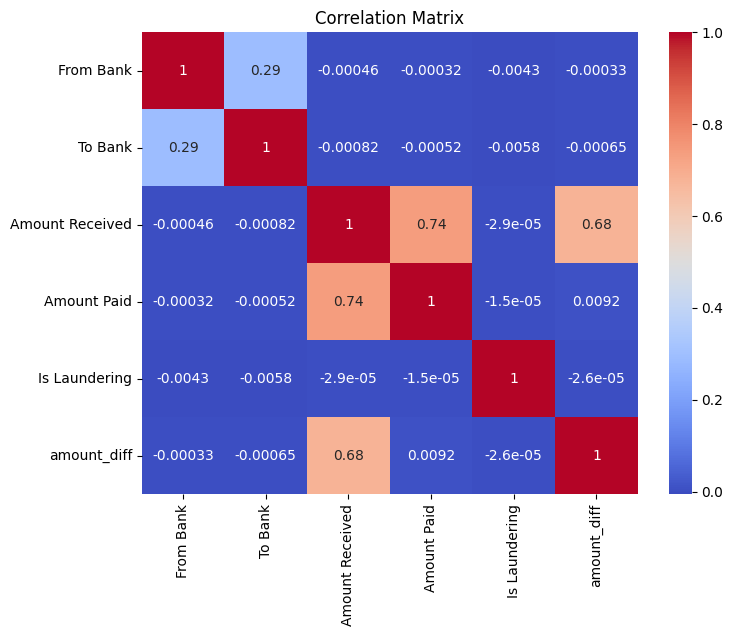

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [42]:
df[df['Amount Received'] != df['Amount Paid']]

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,date,hour,amount_diff
2770,2022-09-01 00:12:00,394,80056EDE0,394,80056EDE0,47.610000,Euro,55.79,US Dollar,ACH,0,2022-09-01,0,-8.180000
8081,2022-09-01 00:28:00,11701,800C95BF0,11701,800C95BF0,954.620000,Yuan,142.53,US Dollar,ACH,0,2022-09-01,0,812.090000
10451,2022-09-01 00:18:00,22481,80105E630,22481,80105E630,16930.030000,Yen,160.63,US Dollar,ACH,0,2022-09-01,0,16769.400000
12948,2022-09-01 00:17:00,1439,8014545C0,1439,8014545C0,14.520000,UK Pound,18.76,US Dollar,ACH,0,2022-09-01,0,-4.240000
13799,2022-09-01 00:02:00,20,8015D68E0,20,8015D68E0,37.000000,Euro,43.35,US Dollar,ACH,0,2022-09-01,0,-6.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924007,2022-09-10 23:57:00,9096,80356BD61,9096,80356BD60,0.000005,Bitcoin,0.39,Yuan,ACH,0,2022-09-10,23,-0.389995
6924009,2022-09-10 23:30:00,9096,80356BD61,9096,80356BD60,0.000007,Bitcoin,0.55,Yuan,ACH,0,2022-09-10,23,-0.549993
6924019,2022-09-10 23:38:00,13474,803A93631,13474,803A93630,0.000007,Bitcoin,0.08,US Dollar,ACH,0,2022-09-10,23,-0.079993
6924021,2022-09-10 23:31:00,13474,803A93631,13474,803A93630,0.000020,Bitcoin,0.23,US Dollar,ACH,0,2022-09-10,23,-0.229980
